In [1]:
%matplotlib inline

In [50]:
import seaborn as sns
from math import sqrt, pow,tan,atan,pi,tau
import numpy as np, pandas as pd
import matplotlib
from matplotlib.pyplot import plot
import matplotlib.pyplot
from scipy.optimize import newton
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

# Principle of Least Action

Assume a particle *p* travelling from (0,y) to (1,0) through two mediums:

```
a. (0,y)
|  .              M2
|    .
|_____.______________
|      .
|       .         M1
|        .
|_________b (1,0)____
```


We want to compute the path a-> b that minimizes time.
#### Assumptions:
* The speed in material m1 is $v_1$
* The speed in material m2 is $v_2$


The intersection point is at (x, $y_1$).  We want to find the value of $x$ that minimizes time $t$


Distance $d = d_1+ d_2 = \sqrt{x^2 + y_2^2} + \sqrt{(1-x)^2 + y_1^2}$

$d = \sqrt{x^2 + y_2^2} + \sqrt{(1-x)^2 + y_1^2}$

$t = \frac{d}{v}$, so


$t_1 =  \frac{1}{v_1} \sqrt{x^2 + y_2^2} , t_2 = \frac{1}{v_2}  \sqrt{1+x^2 - 2x +  y_1^2}$

And we want to find the value $x$ such that $\frac{dt}{dx}$ = 0

In other words, we want $\frac{dt_1}{dx} + \frac{dt_2}{dx} = 0$

To solve this will require using the chain rule

$\frac{dt}{dx} = \frac{dt}{dz}\cdot \frac{dz}{dx}  $



where

$z_1 = x^2 + y_2^2$

$ z_2= 1+ x^2 - 2x+y_1^2$



$\frac{dz_1}{dx} = 2x$, $\frac{dz_2}{dx} = 2x-2$

$t_1 = \frac{1}{v_1}z_1^\frac{1}{2} , t_2 = \frac{1}{v_2}z_2^\frac{1}{2}$



$\frac{dt_1}{dz_1} = \frac{1}{2v_1}z_1^{-\frac{1}{2} }$

$ \frac{dt_2}{dz_2} =  \frac{1}{2v_2}z_2^{-\frac{1}{2}}$

So

$ \frac{dt_1}{dx} = \frac{dt_1}{dz_1} \cdot \frac{dz_1}{dx}  = \frac{1}{2v_1}z_1^{-\frac{1}{2} } \cdot 2x  = \frac{1}{2v_1}(x^2+y_2^2)^{-\frac{1}{2} } \cdot 2x $



$ \frac{dt_2}{dx} = \frac{dt_2}{dz_2} \cdot \frac{dz_2}{dx} = \frac{1}{2v_2}z_2^{-\frac{1}{2}} \cdot (2x-2)  = \frac{1}{2 v_2}(1+x^2-2x+y_1^2)^{-\frac{1}{2}} \cdot (2x-2) $

$ \frac{dt}{dx} =  \frac{dt_1}{dx} + \frac{dt_2}{dx} $

$ \frac{dt}{dx} = \frac{1}{2v_1} \frac{2x}{\sqrt{x^2+y_2^2}}     + \frac{1}{2 v_2}  \frac{(2x-2)}{ \sqrt{1+x^2-2x+y_1^2}}   $



And we want to find the value of $x$ for which 



$\frac{dt}{dx} =\frac{dt_1}{dx} + \frac{dt_2}{dx} = 0 $

$ \frac{1}{2v_1}(x^2+y_2^2)^{-\frac{1}{2} } \cdot 2x  + \frac{1}{2 v_2}(1+x^2-2x+y_1^2)^{-\frac{1}{2}} \cdot (2x-2)  = 0 $

$ \frac{1}{2v_1}(x^2+y_2^2)^{-\frac{1}{2} } \cdot 2x  = -1 \cdot  \frac{1}{2v_2}(1+x^2-2x+y_1^2)^{-\frac{1}{2}} \cdot (2x-2)    $

$ \frac{1}{4v_1^2}(x^2+y_2^2)^{-1 } \cdot 4x^2 =   - \frac{1}{4 v_2^2}(1+x^2-2x+y_1^2)^{-1} \cdot (2x-2)^2    $

$   4 v_2^2 x^2  (1+x^2-2x+y_1^2) =  - (v_1^2)(x^2+y_2^2)     (2x-2)^2    $

Which is a royal pain to solve analytically. Let's do it numerically.

IF we set $y_1 = y_2 = \frac{1}{2}$ and $v_1=2, v_2=1$, then there is some pair of angles $\theta_1, \theta_2$ that meet the above condition, and we can compute them at least numerically by finding $x$

In [55]:
v1=2
v2=1
y1=0.5
y2=0.5
def time(x):
    return ((1/v1)*sqrt(x**2+(1/2)**2)+(1/v2)*sqrt( (1-x)**2 + (1/2)**2))

def delta_time(x):

    return (
        (
              (1/(2*v1)) * (2*x) 
            / (sqrt((x**2)+(y2**2)))
         
        )
        +
        (
            (1/2*v2) * (2*x-2) 
            / sqrt(1+(x**2) - (2*x)+(y1**2)) 
        )
    )


In [68]:
x=pd.Series(np.linspace(0,1,1000))

In [69]:
t=np.array(list(map(time, x)))

In [70]:
t_prime=np.array(list(map(delta_time,x)))

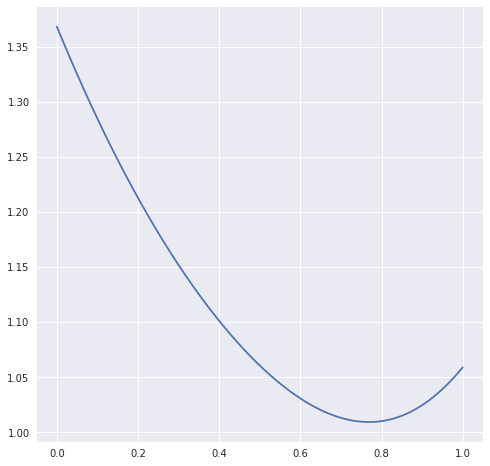

In [71]:
plot(x,t)

Now I want the derivative of this slope, $t'$

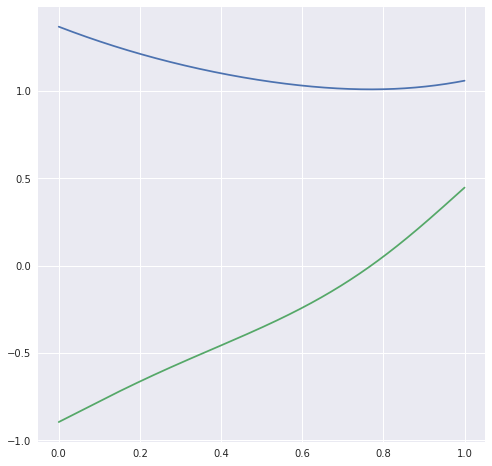

In [72]:
plot(x,t)
plot(x, t_prime)
matplotlib.pyplot.show()

$t$ is at a minimum where $t'$ is at 0

In [86]:
df=pd.DataFrame({'x':x,'t':t,'t_prime':t_prime}).set_index('x')

In [87]:
df.t.idxmin()

0.76876876876876876

So our analytic solution *should* yield approximately $x=0.76$

In [90]:
delta_time(0.76)

-0.015022526462801333

#### Using Newton-Raphson

In [91]:
x_best = newton(delta_time,x0=0.0)

In [92]:
x_best

0.7691321220827947

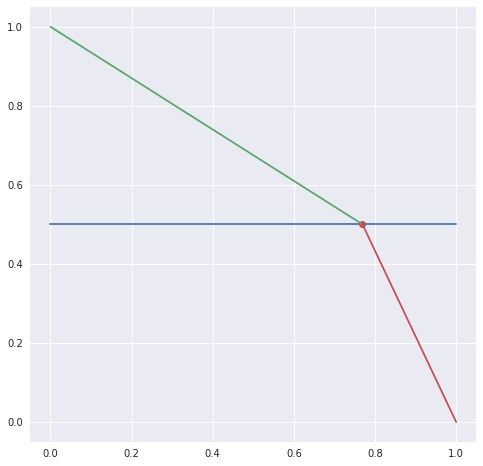

In [93]:
plot([0,1],[0.5,0.5]) # boundary
plot([x_best], [0.5], 'ro')

plot([0,x_best],[1,0.5])
plot([x_best,1],[0.5,0])



#### My understanding is that if I go one step further I'll magically derive Snell's law:


$\frac{sin(\theta_1)}{sin(\theta_2)} = \frac{v_1}{v_2} $

Let's try deriving that from:

$ 4  v_2^2 x^2  (1+x^2-2x+y_1^2) = - (v_1^2)(x^2+y_2^2)     (2x-2)^2    $

$  \frac{v_1^2}{v_2^2}   =  - \frac{4x^2  (1+x^2-2x+y_1^2)}{(x^2+y_2^2) (2x-2)^2}    $

$  \frac{v_1}{v_2}   =   - \frac{2x}{(2x-2) } \frac{   \sqrt{(1+x^2-2x+y_1^2)}}{\sqrt{ (x^2+y_2^2)  }}    $

$  \frac{v_1}{v_2}   =    \frac{x}{(1-x) } \frac{   \sqrt{(1-x)^2+y_1^2}}{d_1}    $

$  \frac{v_1}{v_2}   =    \frac{x}{(1-x) } \frac{   d_2}{d_1}    $

And because we know:

$d_1 sin \theta_1 = x $

$d_2 sin \theta_2 = 1-x $


$\frac{v_1}{v_2} = \frac{sin \theta_1}{ sin \theta_2}$

### And behold, we have Snell's law